In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

import pandas as pd
import seaborn as sns

In [2]:
mtor = pd.read_csv("../../data/chembl_mtor_ic50.csv", delimiter=";")
mtor = mtor[["Molecule ChEMBL ID", "Smiles"]]
mtor["mol"] = mtor.apply(lambda row: Chem.MolFromSmiles(row["Smiles"]), axis=1)
mtor["Source"] = "mtor"
mtor.rename({"Molecule ChEMBL ID":"ID"}, axis=1, inplace=True)

drugbank_mols =  Chem.SDMolSupplier('../../data/drugbank.sdf')
drugbank = [mol for mol in drugbank_mols if mol]
pd_drugbank = pd.DataFrame(drugbank, columns=["mol"])
pd_drugbank["Smiles"] = pd_drugbank.apply(lambda row: Chem.MolToSmiles(row["mol"]), axis=1)
pd_drugbank["Source"] = "drugbank"
pd_drugbank["ID"] = pd_drugbank.apply(lambda row: row["mol"].GetProp("DATABASE_ID"), axis=1)

df = pd.concat([mtor, pd_drugbank])
df_data = pd.DataFrame(list(
    df.apply(
        lambda row: (Descriptors.MolWt(row["mol"]),
                     Descriptors.MolLogP(row["mol"]),
                     Descriptors.NumHAcceptors(row["mol"]),
                     Descriptors.NumHDonors(row["mol"])), axis=1)),
    columns=["MW", "LogP", "NHA", "NHD"])
df = df.join(df_data)

[13:40:56] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:40:56] ERROR: Could not sanitize molecule ending on line 20009
[13:40:56] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[13:40:56] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:40:56] ERROR: Could not sanitize molecule ending on line 250947
[13:40:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:40:56] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:40:56] ERROR: Could not sanitize molecule ending on line 258130
[13:40:56] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[13:40:56] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:40:56] ERROR: Could not sanitize molecule ending on line 261581
[13:40:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:40:56] Explicit valence for atom # 47 Mg, 4, is greater than permitted
[13:40:56] ERROR: Could not sanitize

In [3]:
df_data = pd.DataFrame(list(
    df.apply(
        lambda row: (int(row["MW"] > 500),
                     int(row["LogP"] > 5),
                     int(row["NHA"] > 10),
                     int(row["NHD"] > 5)), axis=1)),
    columns=["MW_r", "LogP_r", "NHA_r", "NHD_r"])
df = df.join(df_data)

In [4]:
df

,ID,Smiles,mol,Source,MW,LogP,NHA,NHD,MW_r,LogP_r,NHA_r,NHD_r
0,CHEMBL1773577,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,<rdkit.Chem.rdchem.Mol object at 0x7fd0fcb4a9e0>,mtor,443.485,3.65160,7,2,0,0,0,0
1,CHEMBL1773561,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,<rdkit.Chem.rdchem.Mol object at 0x7fd0fcb4aa40>,mtor,390.468,4.59912,6,1,0,0,0,0
2,CHEMBL1773077,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd0fb453f40>,mtor,406.467,4.29930,7,1,0,0,0,0
3,CHEMBL1773580,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,<rdkit.Chem.rdchem.Mol object at 0x7fd0fb4538e0>,mtor,443.485,3.65160,7,2,0,0,0,0
4,CHEMBL1773578,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,<rdkit.Chem.rdchem.Mol object at 0x7fd0fb4532e0>,mtor,457.512,3.67590,7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7108,DB13154,Oc1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fd0fca8a740>,drugbank,119.164,-0.92310,3,3,0,0,0,0
7109,DB13155,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,<rdkit.Chem.rdchem.Mol object at 0x7fd0fca8a7a0>,drugbank,422.510,4.78660,8,2,1,0,0,0
7110,DB13156,CC(=O)Nc1ccc(C(=O)O)cc1.CC(=O)Nc1ccc(C(=O)O)cc...,<rdkit.Chem.rdchem.Mol object at 0x7fd0fca8a800>,drugbank,332.249,0.41172,6,5,1,0,0,0
7111,DB13157,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7fd0fca8a860>,drugbank,444.553,5.29802,7,3,0,0,0,0


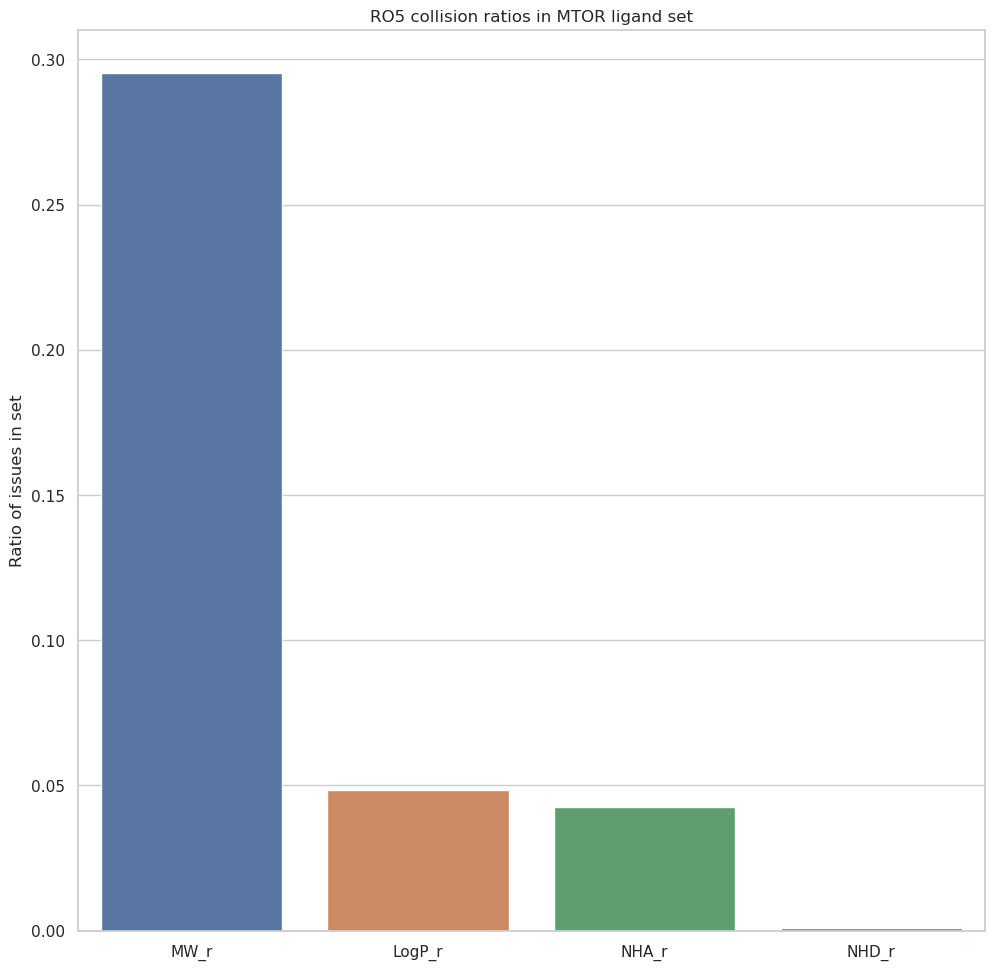

In [5]:
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df[df["Source"] == "mtor"][["MW_r", "LogP_r", "NHA_r", "NHD_r"]], errorbar=None)
    p.set_title("RO5 collision ratios in MTOR ligand set")
    p.set_ylabel("Ratio of issues in set")

In [6]:
df[df["Source"] == "mtor"].describe()

,MW,LogP,NHA,NHD,MW_r,LogP_r,NHA_r,NHD_r
count,4596.000000,4596.000000,4596.00000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000
mean,454.489667,3.135165,7.60248,1.657528,0.295474,0.048520,0.042646,0.000870
std,93.109814,1.140619,1.75847,0.864353,0.456305,0.214887,0.202079,0.029492
min,182.226000,-2.870830,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,393.491000,2.396800,6.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,457.537000,3.070250,8.00000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,509.710750,3.794790,9.00000,2.000000,1.000000,0.000000,0.000000,0.000000
max,1143.122000,9.830160,22.00000,10.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df["ro5"] = df.apply(lambda row: ((row["MW_r"] + row["LogP_r"] + row["NHA_r"] + row["NHD_r"]) > 1), axis=1)

In [8]:
df_data = pd.DataFrame(list(
    df.apply(
        lambda row: (
            rdMolDescriptors.CalcNumRotatableBonds(row["mol"]),
            rdMolDescriptors.CalcTPSA(row["mol"])), axis=1)),
    columns=["NumRotBonds", "TPSA"])
df = df.join(df_data)

In [9]:
df["veber"] = df.apply(lambda row: ((int(row["NumRotBonds"] > 10) + int(row["TPSA"] > 140)) > 0), axis=1)

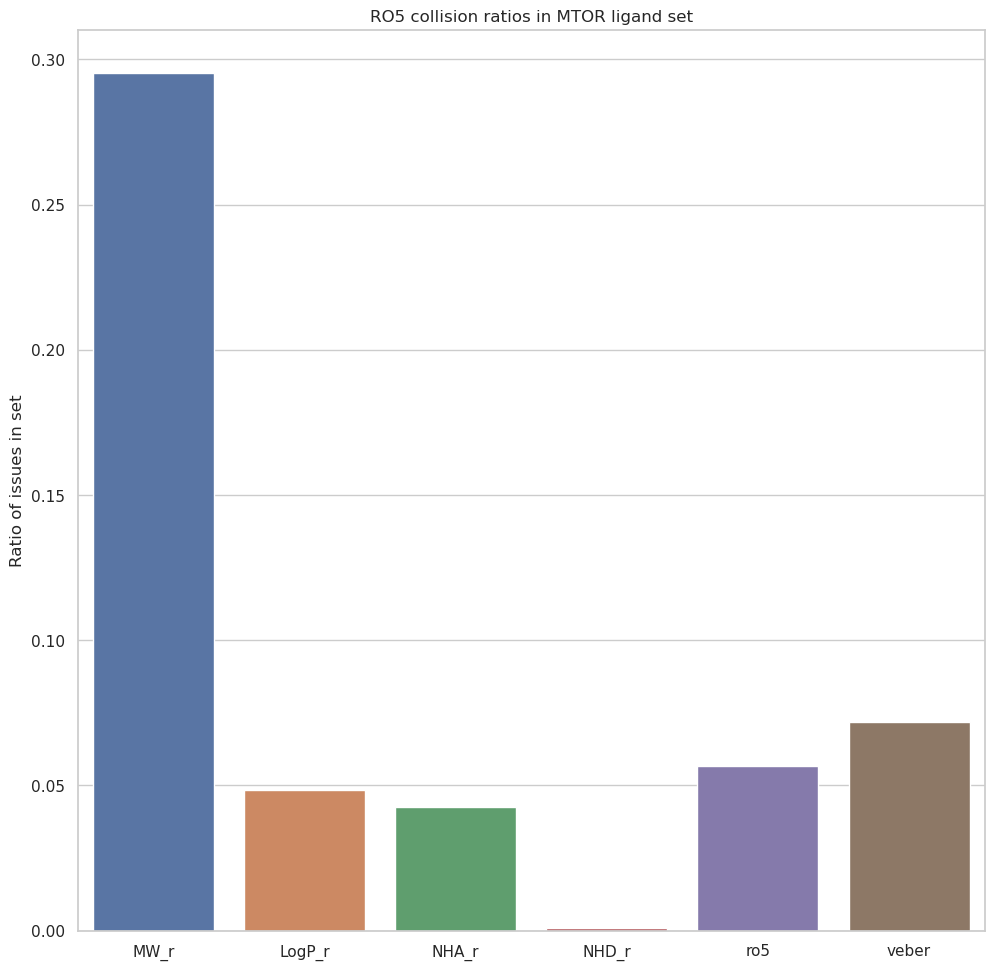

In [10]:
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df[df["Source"] == "mtor"][["MW_r", "LogP_r", "NHA_r", "NHD_r", "ro5", "veber"]], errorbar=None)
    p.set_title("RO5 collision ratios in MTOR ligand set")
    p.set_ylabel("Ratio of issues in set")

In [17]:
filters = {"carb": Chem.MolFromSmarts("OC=O"),
           "benzene": Chem.MolFromSmarts("c1ccccc1"),
           "conj": Chem.MolFromSmarts("C=CC=CC=C"),
           "al": Chem.MolFromSmarts("*=C=*"),
           "c": Chem.MolFromSmarts("C")}

In [12]:
mol = df["mol"].reset_index(drop=True)[0]

In [13]:
mol.GetSubstructMatches(filters["benzene"])

((6, 7, 8, 9, 27, 28), (19, 20, 21, 22, 23, 24))

In [18]:
df_data = pd.DataFrame(list(
    df.apply(
        lambda row: (
            len(row["mol"].GetSubstructMatches(filters[k])) for k in filters), axis=1)),
    columns=filters.keys())
# df = df.join(df_data)

<AxesSubplot:>

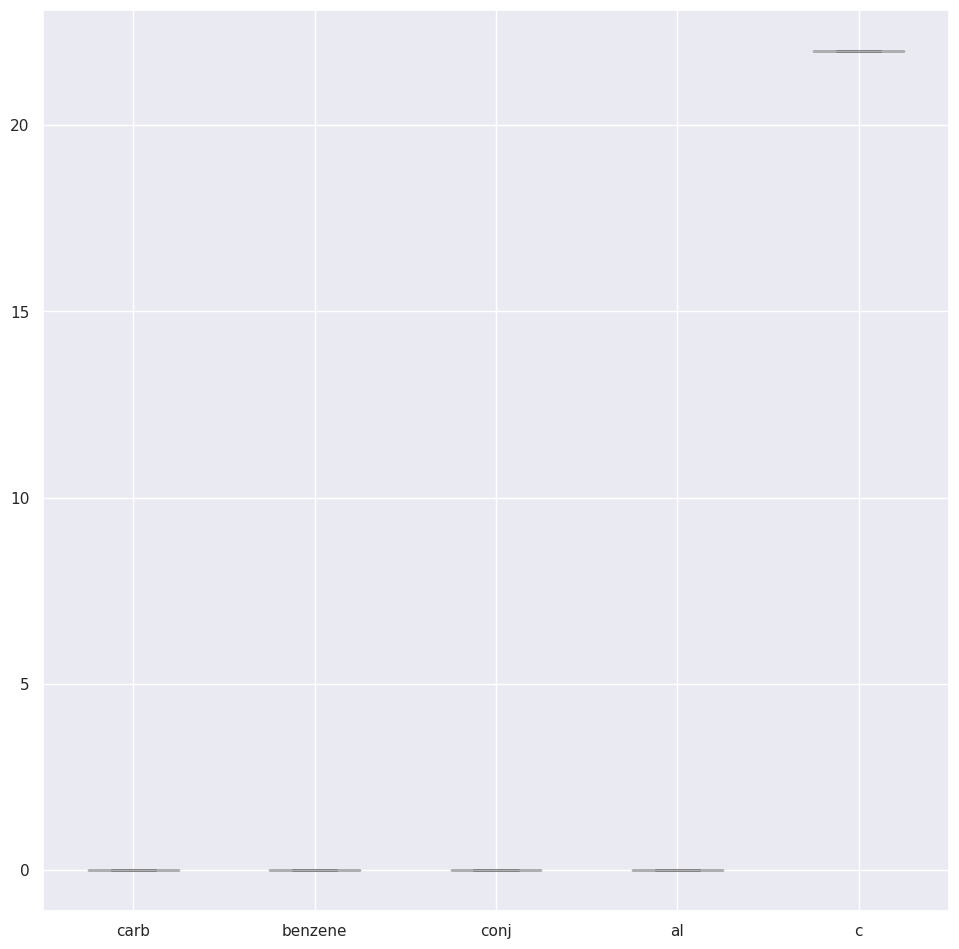

In [19]:
df_data.boxplot()